In [22]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,Flatten


In [23]:
import pathlib


data_dir = pathlib.Path('dataset')


dataset/rose/16209331331_343c899d38.jpg


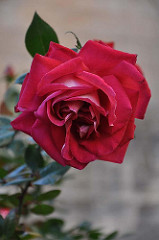

In [24]:
roses= list(data_dir.glob('rose/*'))
print(roses[0])
PIL.Image.open(str(roses[1]))

In [25]:
img_height,img_width=240,240
batch_size=32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode='categorical',  
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2599 files belonging to 3 classes.
Using 2080 files for training.


In [26]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='categorical',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2599 files belonging to 3 classes.
Using 519 files for validation.


In [27]:
class_names=train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose']


In [28]:
#define model - get from keras/application

In [29]:
model = Sequential()


pretrained_model= tf.keras.applications.VGG16(
                    include_top=False,
                    weights="imagenet",
                    input_shape=(240,240,3),
                    pooling='avg',
                    classes=3,
                  
)
for layer in pretrained_model.layers:
        layer.trainable=False

model.add(pretrained_model)

#Now, that we have imported a pre-trained model, we will also add a fully connected and output layer where actual learning can take place.

In [30]:
model.add(Flatten()) #flatten to 1D
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))#output layer

In [31]:
model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dense_5 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 14,978,883
Trainable params: 264,195
Non-trainable params: 14,714,688
_________________________________________________________________


#The key point to note over here is that the total number of parameters in the Resnet50 model is 24 million. But the trainable parameters are only 1 million.

In [34]:
model.compile(optimizer=Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

hist = model.fit(train_ds, validation_data=val_ds, epochs=20)



Epoch 1/20


2022-05-15 02:23:57.625673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - ETA: 0s - loss: 0.0948 - accuracy: 0.9712

2022-05-15 02:24:17.763766: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


65/65 [==============================] - 26s 375ms/step - loss: 0.0948 - accuracy: 0.9712 - val_loss: 0.2731 - val_accuracy: 0.9306
Epoch 2/20
65/65 [==============================] - 24s 369ms/step - loss: 0.0513 - accuracy: 0.9846 - val_loss: 0.3427 - val_accuracy: 0.9287
Epoch 3/20
65/65 [==============================] - 24s 372ms/step - loss: 0.0217 - accuracy: 0.9909 - val_loss: 0.3109 - val_accuracy: 0.9306
Epoch 4/20
65/65 [==============================] - 24s 371ms/step - loss: 0.0122 - accuracy: 0.9957 - val_loss: 0.3711 - val_accuracy: 0.9383
Epoch 5/20
65/65 [==============================] - 24s 371ms/step - loss: 0.0428 - accuracy: 0.9899 - val_loss: 0.5283 - val_accuracy: 0.9249
Epoch 6/20
65/65 [==============================] - 24s 375ms/step - loss: 0.1229 - accuracy: 0.9745 - val_loss: 0.4238 - val_accuracy: 0.9249
Epoch 7/20
65/65 [==============================] - 25s 380ms/step - loss: 0.0360 - accuracy: 0.9870 - val_loss: 0.3705 - val_accuracy: 0.9422
Epoch 8/20

Graph for 20 epochs

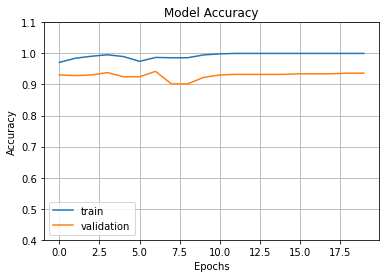

In [36]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1.1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()